In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

ds_class = pd.read_csv("csgo_class.csv")
#ds_reg = pd.read_csv("csgo_reg.csv")

# в них есть непонятный столбец Unnamed. Удаляем его
ds_class = ds_class.drop('Unnamed: 0', axis=1)
#ds_reg = ds_reg.drop('Unnamed: 0', axis=1)

In [133]:
ds_class

,time_left,t_score,ct_score,t_money,ct_money,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,t_weapon_awp,ct_weapon_m4a4,...,t_weapon_aug,ct_weapon_sg553,t_weapon_sg553,ct_defuse_kits,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner
0,174.95,3.0,1.0,24900.0,18600.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,5.0,5.0,500.0,500.0,False,CT
1,34.96,9.0,7.0,350.0,700.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3.0,3.0,267.0,200.0,False,T
2,174.94,14.0,9.0,20650.0,18000.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,5.0,500.0,500.0,False,T
3,54.95,4.0,2.0,9250.0,4300.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,5.0,192.0,355.0,False,T
4,94.94,0.0,10.0,1750.0,36250.0,0.0,0.0,1.0,0.0,2.0,...,0.0,2.0,3.0,5.0,5.0,3.0,500.0,299.0,False,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37.43,11.0,8.0,17100.0,150.0,0.0,2.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,3.0,4.0,249.0,334.0,True,T
99996,34.94,6.0,7.0,4500.0,2000.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,2.0,150.0,199.0,False,CT
99997,174.95,0.0,2.0,13250.0,19550.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,5.0,5.0,500.0,500.0,False,CT
99998,34.95,3.0,3.0,7500.0,700.0,0.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,3.0,2.0,267.0,127.0,False,CT


In [134]:
# убираю все строки, где игроки 5 на 5
# P.s. предсказывать победу в начале раунда, конечно, интересно, но это очень сложно, и выше 78% у меня вообще никак не получилось добиться.
# Я смотрю время до конца раунда (в секундах), счет, деньги, живые игроки, их здоровье, бомба, дифуза, и самые популярные оружия (эмки, калаш, авп, ауг, сг)

ds_class = ds_class.loc[((ds_class['ct_players_alive'] != 5.0) & (ds_class['t_players_alive'] != 5.0))]
ds_class

,time_left,t_score,ct_score,t_money,ct_money,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,t_weapon_awp,ct_weapon_m4a4,...,t_weapon_aug,ct_weapon_sg553,t_weapon_sg553,ct_defuse_kits,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner
1,34.96,9.0,7.0,350.0,700.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3.0,3.0,267.0,200.0,False,T
7,14.92,4.0,4.0,4900.0,1550.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,347.0,197.0,False,CT
11,94.95,3.0,15.0,200.0,5600.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,2.0,3.0,4.0,4.0,300.0,400.0,False,T
13,27.72,3.0,9.0,3150.0,6700.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,2.0,3.0,146.0,270.0,True,T
21,77.27,7.0,13.0,2850.0,1100.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,1.0,3.0,4.0,274.0,297.0,False,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,19.79,14.0,14.0,4100.0,500.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,2.0,2.0,23.0,174.0,True,T
99989,30.12,11.0,15.0,4100.0,7700.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,2.0,3.0,93.0,229.0,True,T
99995,37.43,11.0,8.0,17100.0,150.0,0.0,2.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,3.0,4.0,249.0,334.0,True,T
99996,34.94,6.0,7.0,4500.0,2000.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,2.0,150.0,199.0,False,CT


In [135]:
# Это рудимент. Здесь я пытался оставить 5 на 5 и исключить все каверзные ситуации (клатчи, победа в эко-раундах, одинаковый счет с деньгами и т.п)

"""
for i in range(len(ds_class)):
    try:
        if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)

        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) <= 5000:
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 4 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) <= 5000:
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 3 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) <= 5000:
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 2 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 2 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) <= 5000:
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) <= 5000:
            ds_class = ds_class.drop(index = i)

        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 4 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 3 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 2 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 2 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and \
        abs(ds_class['t_money'].loc[ds_class.index[i]] - ds_class['ct_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and \
        abs(ds_class['ct_money'].loc[ds_class.index[i]] - ds_class['t_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 4 and \
        abs(ds_class['ct_money'].loc[ds_class.index[i]] - ds_class['t_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 3 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 3 and \
        abs(ds_class['ct_money'].loc[ds_class.index[i]] - ds_class['t_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 2 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 2 and \
        abs(ds_class['ct_money'].loc[ds_class.index[i]] - ds_class['t_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and \
        abs(ds_class['ct_money'].loc[ds_class.index[i]] - ds_class['t_money'].loc[ds_class.index[i]]) >= 10000 and \
        ds_class['round_winner'].loc[ds_class.index[i]] == 'T':
            ds_class = ds_class.drop(index = i)
        
    except:
        next
   
ds_class
"""

"\nfor i in range(len(ds_class)):\n    try:\n        if ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':\n            ds_class = ds_class.drop(index = i)\n        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 5 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':\n            ds_class = ds_class.drop(index = i)\n        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['round_winner'].loc[ds_class.index[i]] == 'CT':\n            ds_class = ds_class.drop(index = i)\n        elif ds_class['ct_players_alive'].loc[ds_class.index[i]] == 4 and ds_class['t_players_alive'].loc[ds_class.index[i]] == 1 and ds_class['round_winner'].loc[ds_class.index[i]] == 'T':\n            ds_class = ds_class.drop(index =

In [136]:
# преобразовываем нечисловые данные в числовые
ds_class_num = pd.get_dummies(ds_class)
ds_class_num.head(10)

,time_left,t_score,ct_score,t_money,ct_money,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,t_weapon_awp,ct_weapon_m4a4,...,ct_weapon_sg553,t_weapon_sg553,ct_defuse_kits,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner_CT,round_winner_T
1,34.96,9.0,7.0,350.0,700.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,3.0,267.0,200.0,False,0,1
7,14.92,4.0,4.0,4900.0,1550.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,2.0,347.0,197.0,False,1,0
11,94.95,3.0,15.0,200.0,5600.0,0.0,1.0,1.0,1.0,2.0,...,0.0,2.0,3.0,4.0,4.0,300.0,400.0,False,0,1
13,27.72,3.0,9.0,3150.0,6700.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,2.0,2.0,3.0,146.0,270.0,True,0,1
21,77.27,7.0,13.0,2850.0,1100.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,3.0,4.0,274.0,297.0,False,0,1
26,68.37,5.0,1.0,9400.0,850.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,3.0,280.0,300.0,False,1,0
33,34.04,6.0,8.0,1350.0,3400.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3.0,100.0,183.0,False,0,1
34,26.91,15.0,10.0,10800.0,4150.0,0.0,2.0,1.0,0.0,3.0,...,0.0,0.0,3.0,4.0,3.0,400.0,299.0,False,1,0
39,4.94,3.0,0.0,15900.0,350.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,2.0,3.0,181.0,104.0,True,0,1
45,13.11,5.0,5.0,28150.0,6850.0,1.0,1.0,1.0,1.0,0.0,...,1.0,2.0,2.0,3.0,4.0,300.0,286.0,True,0,1


In [137]:
# не преобразовался bool bomb_planted. Приводим в тип int
ds_class_num["bomb_planted"] = ds_class_num["bomb_planted"].astype(int)
ds_class_num

,time_left,t_score,ct_score,t_money,ct_money,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,t_weapon_awp,ct_weapon_m4a4,...,ct_weapon_sg553,t_weapon_sg553,ct_defuse_kits,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner_CT,round_winner_T
1,34.96,9.0,7.0,350.0,700.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,3.0,267.0,200.0,0,0,1
7,14.92,4.0,4.0,4900.0,1550.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,2.0,347.0,197.0,0,1,0
11,94.95,3.0,15.0,200.0,5600.0,0.0,1.0,1.0,1.0,2.0,...,0.0,2.0,3.0,4.0,4.0,300.0,400.0,0,0,1
13,27.72,3.0,9.0,3150.0,6700.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,2.0,2.0,3.0,146.0,270.0,1,0,1
21,77.27,7.0,13.0,2850.0,1100.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,3.0,4.0,274.0,297.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,19.79,14.0,14.0,4100.0,500.0,0.0,1.0,0.0,0.0,2.0,...,0.0,1.0,1.0,2.0,2.0,23.0,174.0,1,0,1
99989,30.12,11.0,15.0,4100.0,7700.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,2.0,2.0,3.0,93.0,229.0,1,0,1
99995,37.43,11.0,8.0,17100.0,150.0,0.0,2.0,1.0,1.0,2.0,...,0.0,1.0,0.0,3.0,4.0,249.0,334.0,1,0,1
99996,34.94,6.0,7.0,4500.0,2000.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,2.0,2.0,150.0,199.0,0,1,0


<AxesSubplot:>

C:\Users\artem\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


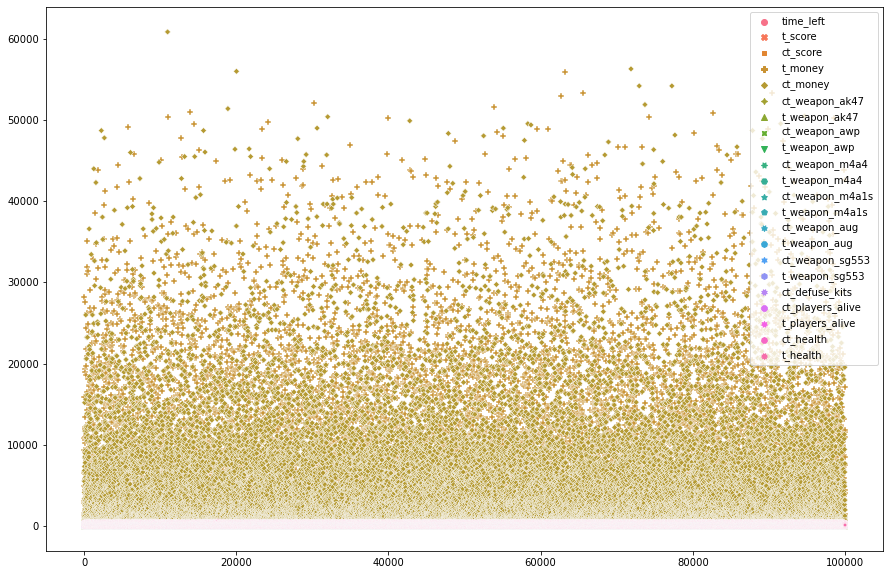

In [138]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=ds_class_num[ds_class_num.columns[:-3]])

# как видно на графике (ось ординат, три последних столбца отбросили), до нормализации довольно далеко, значения лежат в диапозоне от 0 до 80 000
# и всю картину портят деньги

<AxesSubplot:>

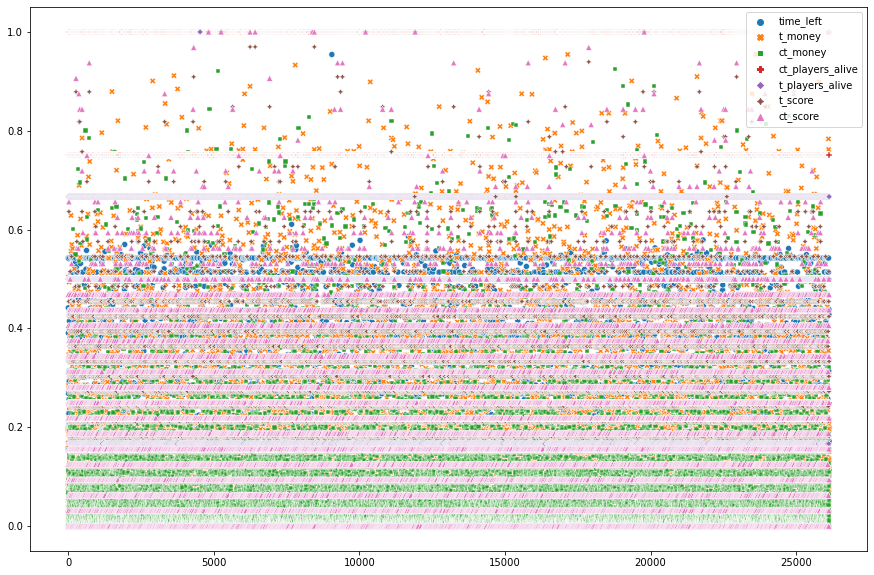

In [139]:
import sklearn.preprocessing as preprocessing

# Данный нормализатор выравнивает данные относительно максимального по модулю
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(ds_class_num)
ma_norm_data = pd.DataFrame(columns=ds_class_num.columns, data=ma_scaler.transform(ds_class_num))

plt.figure(figsize=(15, 10))
sns.scatterplot(data=ma_norm_data[['time_left', 't_money', 'ct_money', 'ct_players_alive', 't_players_alive', 't_score', 'ct_score']])

# смотрим только "интересные" столбцы
# теперь данные нормализованы. Интересно заметить, что очки и кол-во живых игроков (принимают только целые значения) образуют линии.

In [140]:
# тут при необходимости убрать (добавить) столбцы
# ma_norm_data = ma_norm_data[['t_score', 'ct_score', 't_money', 'ct_money', 'ct_players_alive', 't_players_alive', 'ct_health', 't_health', 'bomb_planted', 'round_winner_CT', 'round_winner_T']]
ma_norm_data

,time_left,t_score,ct_score,t_money,ct_money,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,t_weapon_awp,ct_weapon_m4a4,...,ct_weapon_sg553,t_weapon_sg553,ct_defuse_kits,ct_players_alive,t_players_alive,ct_health,t_health,bomb_planted,round_winner_CT,round_winner_T
0,0.199771,0.272727,0.21875,0.006261,0.011504,0.0,0.25,0.00,0.0,0.00,...,0.00,0.50,0.00,0.75,0.500000,0.6675,0.333333,0.0,0.0,1.0
1,0.085257,0.121212,0.12500,0.087657,0.025472,0.5,0.25,0.00,0.5,0.00,...,0.00,0.00,0.00,1.00,0.333333,0.8675,0.328333,0.0,1.0,0.0
2,0.542571,0.090909,0.46875,0.003578,0.092030,0.0,0.25,0.25,0.5,0.50,...,0.00,0.50,0.75,1.00,0.666667,0.7500,0.666667,0.0,0.0,1.0
3,0.158400,0.090909,0.28125,0.056351,0.110107,0.0,0.50,0.25,0.5,0.25,...,0.00,0.00,0.50,0.50,0.500000,0.3650,0.450000,1.0,0.0,1.0
4,0.441543,0.212121,0.40625,0.050984,0.018077,0.0,0.00,0.25,0.5,0.00,...,0.25,0.50,0.25,0.75,0.666667,0.6850,0.495000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26127,0.113086,0.424242,0.43750,0.073345,0.008217,0.0,0.25,0.00,0.0,0.50,...,0.00,0.25,0.25,0.50,0.333333,0.0575,0.290000,1.0,0.0,1.0
26128,0.172114,0.333333,0.46875,0.073345,0.126541,0.0,0.75,0.00,0.0,0.25,...,0.00,0.00,0.50,0.50,0.500000,0.2325,0.381667,1.0,0.0,1.0
26129,0.213886,0.333333,0.25000,0.305903,0.002465,0.0,0.50,0.25,0.5,0.50,...,0.00,0.25,0.00,0.75,0.666667,0.6225,0.556667,1.0,0.0,1.0
26130,0.199657,0.181818,0.21875,0.080501,0.032868,0.0,0.00,0.25,0.0,0.00,...,0.00,0.00,0.50,0.50,0.333333,0.3750,0.331667,0.0,1.0,0.0


In [141]:
# переопределение переменных
# В перепенной X_train хранятся данные для тренировки сети (входные (время, деньги, живые игроки и т.д.))
# В перепенной Y_train хранятся данные для тренировки сети (выходные или правильные ответы (кто победил))
from sklearn.model_selection import train_test_split

X = ma_norm_data[ma_norm_data.columns[:-2]]
Y = ma_norm_data[ma_norm_data.columns[-1:]]

# Делим
# Делить будем в отношении 80/20
# 80 - это обучение
# 20 - тест
# первым делом перемешаем выборку (надо для того что бы обе выборки были репрезентативными)
XY_data = np.hstack( (X, Y) ).transpose((0,1))
np.random.shuffle(XY_data)
# Делим выборки
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data[:point_split]
test_data = XY_data[point_split:]
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
Y
# в Y террористы, т.е. предсказываю победу или поражение террористов
# 1 - победа, 0 - поражение

Всего данных: 26132
Тренировочных данных: 20906
Тестовых данных: 5226


,round_winner_T
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
26127,1.0
26128,1.0
26129,1.0
26130,0.0


In [181]:
import keras

# Строка отвечает за подключение сущности Dense которая реализует простой полносвязный слой сети (FFN)
from keras.layers import Dense

# Строка отвечает за подключение сущности Sequential которая реализует саму нейронную сеть
from keras.models import Sequential

# Это импорт (activations) содержи в себе список функций активации для сети
from keras import activations

# Тут мы подключаем алгоритмы тренировки Адам и алгоритм обратного распостранения ошибки(RMSprop)
from keras.optimizers import Adam, RMSprop

# Подключаем фукцию подсчета ошибки сети (кросэтропися для данных представленных в виде категорий)
from keras.losses import categorical_crossentropy, binary_crossentropy

# Подключаем фукцию подсчета метрики сети (точность попадания в категорию)
from keras.metrics import categorical_accuracy, binary_accuracy

# библиотека дополнительных возможностей (действий) при обучении сети
from keras import callbacks

# функция для создания новой нейронной сети
def make_nn(input_len, output_len):
    # Создаем сущность сети
    model = Sequential()
    
    # Добавляем слой сети из 10 нейронов с функцией активации Relu и количеством входов равным количеству столбцов во входном массиве
    model.add(Dense(30, activation=activations.relu, input_dim=input_len))
    
    model.add(Dense(30, activation=activations.relu))
    
    # Добавляем последний слой(выходной) количество нейронов равно количеству столбцов в выходном массиве и функцией активации sigmoid
    # в двух словах она нужна для бинарной классификации
    # бинарная классификация - это, например, в нашем случае предсказать победу террористов (один единственный выход)
    # 1 - победили, 0 - проиграли
    # в другом случае можно использовать, например, softmax
    model.add(Dense(output_len, activation=activations.sigmoid))
    
    # Компилируем (собираем) сеть с параметрами:
    # алгоритм обучения: Adam
    # Функция обивки: binary_crossentropy (опять же для бинарных)
    # в других категориальных случаях: categorical_crossentropy
    # дополнительные метрики:
    # categorical_accuracy
    model.compile(Adam(), binary_crossentropy, metrics=['acc'])
    
    return model

from pathlib import Path
from os import remove

# создадим функцию создания о очистки каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'nn_model_loss-{loss:.2f}_val_loss-{val_loss:.2f}_acc-{acc:.2f}_val_acc-{val_acc:.2f}.hdf5'

def make_save_points(name='save_points', file_name=file_name):
    # выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

In [182]:
"""Запускаем обучение сети с параметрами:

1 параметр: матрица с входным массивом
2 параметр: матрица с требуемыми ответами (выходная матрица)
verbose=0 : устанавливаем уровень вывода отладочной информации на 0 уровень
epochs=25 : задаем количество эпох для обучения (100 для начала более чем достаточно)
batch_size=3 : размер группы для обучения (пакетный метод), где говорится как часто пересчитывать веса сети (влияет на скорость и что более важно на качество обучения (параметр подбирается опытным путем))"""


# создаем новую нейронную сеть
model = make_nn(X_train.shape[1], Y_train.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
            # На основе какого значения будет приниматься решеня об остановке
            monitor='val_acc',
            # Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
            # Количество эпох в резельтате которых если значение не изменилось, то произвести остановку
            patience=20,
            # "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.0001,
        ),
        # Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
            # Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
            # Указываем какое значение отслеживать
            monitor='val_acc',
            # Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
            # Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=2,
            # Указываем сторону лучших значений
            mode='max'
        )
    ]
    
)
print('Обучение закончено')

# val_acc - это точность попаданий (угадал 65 из 100. точность 0.65 (порог 0.5)) больше - лучше
# val_loss - это расстояние между прогнозом и действительным значением. меньше - лучше
#model.fit(X_train, y_train, verbose=2, epochs=25, batch_size=3)

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\artem\new_machine\save_points
Удаляем файл save_points\nn_model_loss-0.37_val_loss-0.37_acc-0.82_val_acc-0.82.hdf5
Удаляем файл save_points\nn_model_loss-0.38_val_loss-0.36_acc-0.81_val_acc-0.82.hdf5
Epoch 1/100
20905/20905 [==============================] - 26s 1ms/step - loss: 0.3944 - acc: 0.8078 - val_loss: 0.3668 - val_acc: 0.8209
Epoch 2/100
20905/20905 [==============================] - 25s 1ms/step - loss: 0.3769 - acc: 0.8175 - val_loss: 0.3618 - val_acc: 0.8244
Epoch 3/100
20905/20905 [==============================] - 25s 1ms/step - loss: 0.3745 - acc: 0.8194 - val_loss: 0.3581 - val_acc: 0.8223
Epoch 4/100
20905/20905 [==============================] - 26s 1ms/step - loss: 0.3725 - acc: 0.8163 - val_loss: 0.3777 - val_acc: 0.8095
Epoch 5/100
20905/20905 [==============================] - 29s 1ms/step - loss: 0.3695 - acc: 0.8209 - val_loss: 0.3566 - val_acc: 0.8267
Epoch 6/100
20905/20905 [==============

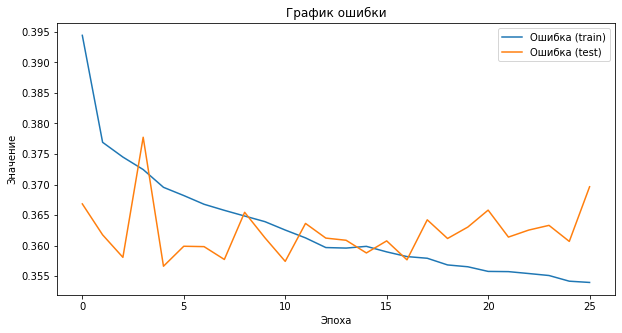

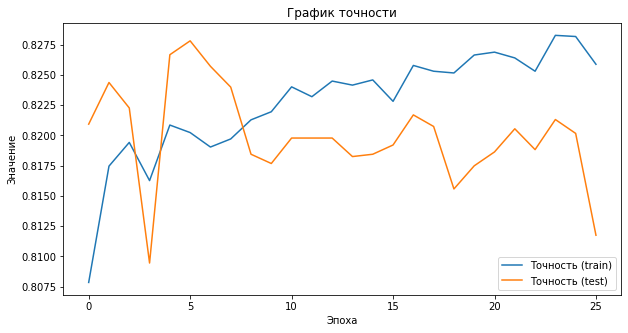

In [183]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [185]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points/nn_model_loss-0.37_val_loss-0.36_acc-0.82_val_acc-0.83.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, Y_train)[1]}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, Y_test)[1]}')
predict = loaded_model.predict(X_test)
predict

654/654 [==============================] - 1s 1ms/step - loss: 0.3627 - acc: 0.8219
Точность предсказания на тренировочных данных 0.8219086527824402
164/164 [==============================] - 0s 1ms/step - loss: 0.3599 - acc: 0.8278
Точность предсказания на тестовых данных 0.8278170824050903
164/164 [==============================] - 0s 1ms/step


array([[0.6146807 ],
       [0.9542536 ],
       [0.80029655],
       ...,
       [0.00119238],
       [0.01799281],
       [0.03548746]], dtype=float32)

In [186]:
# получаем вероятность
print(loaded_model.predict(X_test.head(10)))
# получаем классы (но у нас он один)
#loaded_model.predict(X_test).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step
[[0.6146807 ]
 [0.9542536 ]
 [0.80029655]
 [0.86289895]
 [0.99730784]
 [0.00667172]
 [0.85175776]
 [0.01807125]
 [0.99678063]
 [0.20709205]]


164/164 [==============================] - 0s 1ms/step


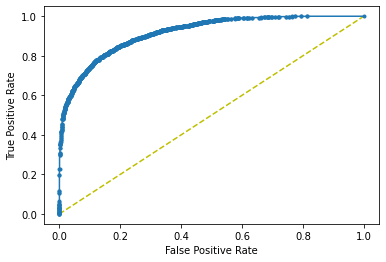

In [187]:
# ROC кривая
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve

y_pred_proba = loaded_model.predict(X_test).ravel()
fpr, tpr, th = roc_curve(Y_test, y_pred_proba)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot (fpr, tpr, marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [205]:
# Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.
# метрика F1 грубо говоря объединяет их (больше - лучше). Это точность нейронки (т.е. например я предсказываю победу с точностью 70%)
# Про порог. Вот нейронка выплюнула число от 0 до 1. Например 0.234. У меня бинарная классификация, т.е. террористы либо победили (1),
# либо проиграли (0). Чем выплюнутое число ближе к 1, тем больше вероятность, что террористы победили. И наоборот: чем ближе к нулю, то скорее всего
# проиграли. Надо установить порог: "при каком значении засчитывать победу, а при каком - поражение". Установили порог 0.4. У нас на выходе 0.234.
# 0.234 < 0.4, значит террористы скорее всего проиграли. Этот порог довольно сильно влияет на точность F1
# P.s. порог 0.5 далеко не всегда является лучшим решением
porog = 0.45
print('F1')
print(f1_score(Y_test, loaded_model.predict(X_test) >= porog))
print('Recall')
print(recall_score(Y_test, loaded_model.predict(X_test) >= porog))
print('Precision')
print(precision_score(Y_test, loaded_model.predict(X_test) >= porog))

F1
164/164 [==============================] - 0s 1ms/step
0.8484747457909652
Recall
164/164 [==============================] - 0s 1ms/step
0.8778889272162814
Precision
164/164 [==============================] - 0s 1ms/step
0.8209677419354838


(26132, 2)
1391/1391 [==============================] - 2s 1ms/step


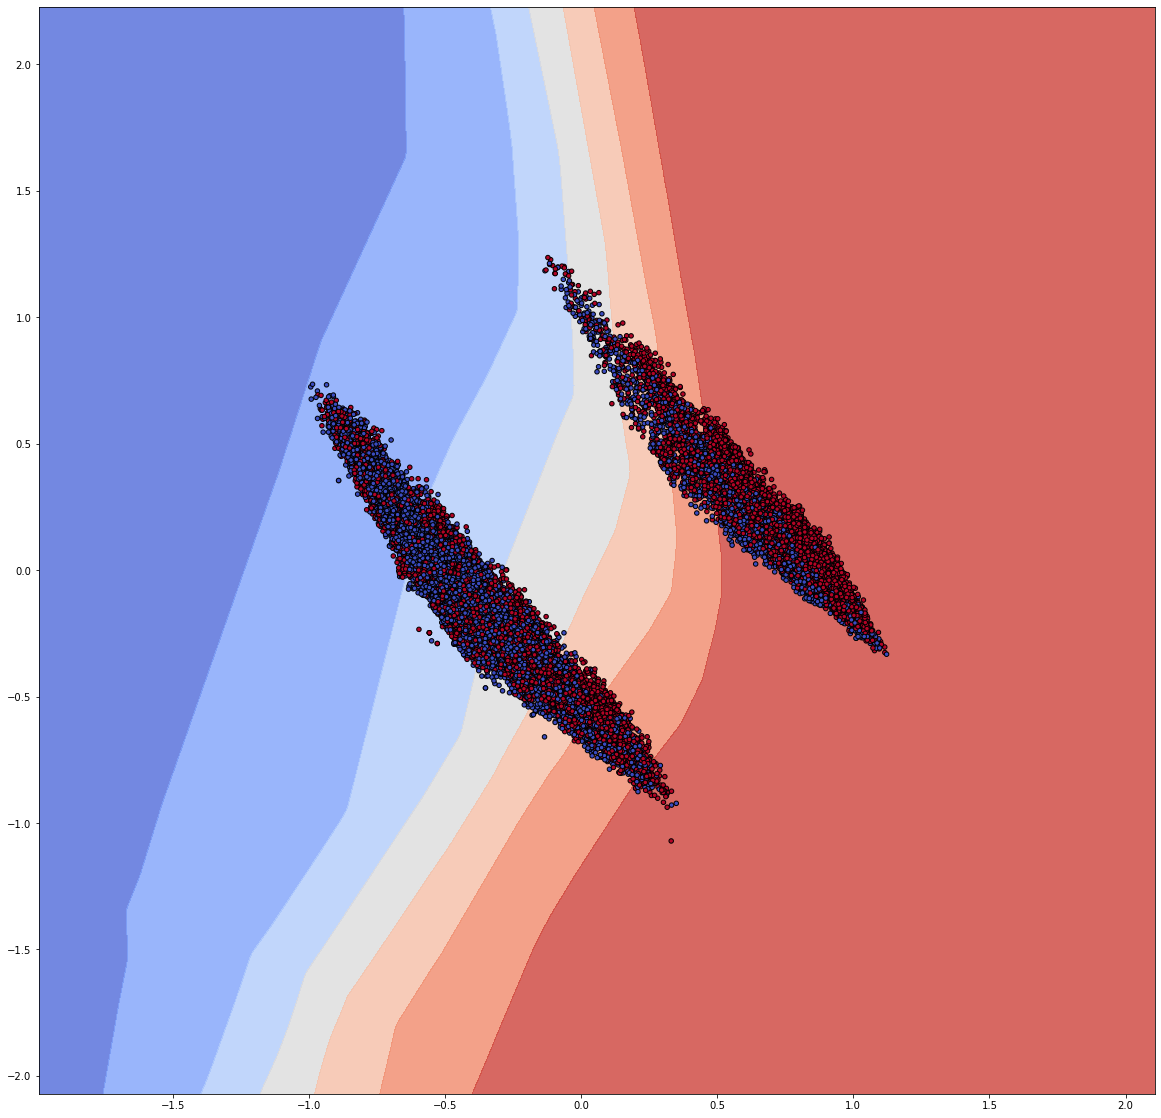

In [206]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

from sklearn.decomposition import PCA

# Задаем ту модель, которую будем использовать для рисования графика
model_clf = loaded_model

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: model_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(20, 20))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y.apply(lambda x: x).values, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# НОЛЬ -синяя, красная - 1
# красные - победили Т. Синияя - победили КТ